# Predictive Model

<hr>

## Imports

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix 

import seaborn as sns
import matplotlib.pyplot as plt

## Creating a Dtaframe from CSV file

In [2]:
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)
df = df.reset_index(drop=True)

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


### We will one hot encode the categorical columns.

In [4]:
df_final = df

In [5]:
# Create an instance of the one-hot encoder for 'sales_channel'
sales_channel_encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot encode 'sales_channel'
encoder_df = pd.DataFrame(sales_channel_encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0: 'Internet', 1: 'Mobile'})
df_final = df_final.join(encoder_df)

# Create a separate instance of the one-hot encoder for 'trip_type'
trip_type_encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot encode 'trip_type'
encoder_df = pd.DataFrame(trip_type_encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0: 'RoundTrip', 1: 'OneWayTrip', 2: 'CircleTrip'})
df_final = df_final.join(encoder_df)

In [6]:
# Drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [7]:
# Store the label for supervised learning
label = df['booking_complete']

In [8]:
df_final = df_final.drop('booking_complete', axis=1)

In [9]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the Values

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_final)

In [11]:
# Create a dataframe of scaled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [12]:
# Add the labels back to the dataframe
scaled_df['label']  = label

In [13]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


## Correlation Matrix

<Axes: >

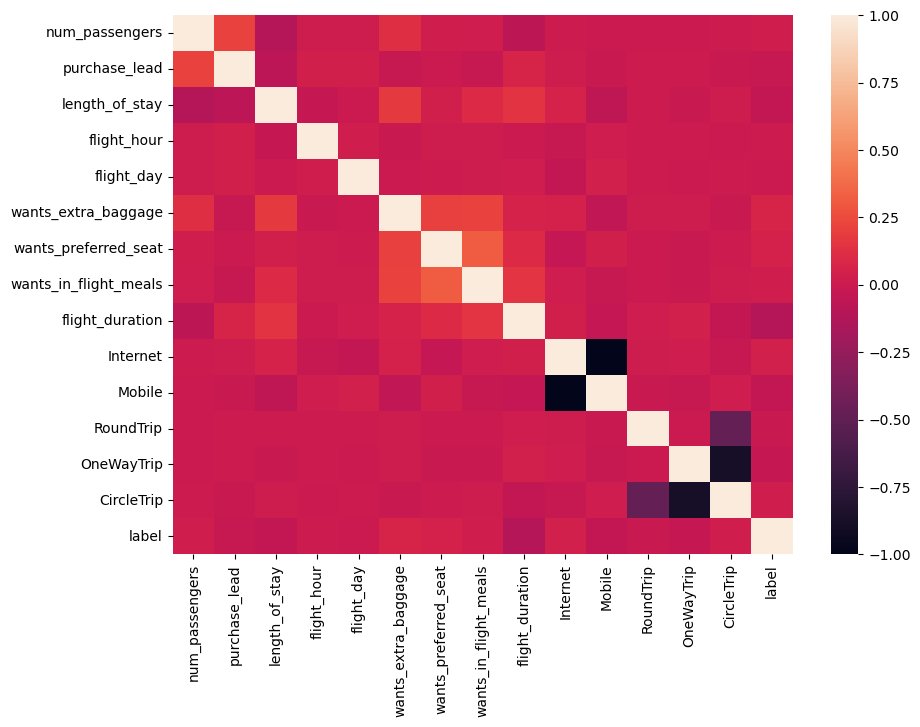

In [14]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(corr)

## Model Building

Create functions to fit and predict the values of whether the customer would complete the booking. Includes the functions with metrics to evaluate the model prediction.

In [15]:
# Define classifiers to test (Random Forest and Logistic Regression)
classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0),
    "Logistic Regression": LogisticRegression(),
}

# Create functions to fit and predict the values of whether the customer would complete the booking.

def model_fit_predict(model, X_train, y_train, X_predict):
    model.fit(X_train, y_train)
    return model.predict(X_predict)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model_fit_predict(model, X_train, y_train, X_train)
    y_pred_test = model_fit_predict(model, X_train, y_train, X_test)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    return train_acc, test_acc, f1_train, f1_test, precision_train, precision_test

# Split your data into train and test sets
X = scaled_df.iloc[:, :-1]
y = scaled_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through classifiers, fit, and evaluate each one
for name, classifier in classifiers.items():
    train_acc, test_acc, f1_train, f1_test, precision_train, precision_test = evaluate_model(classifier, X_train, y_train, X_test, y_test)
    print(f"Results for {name} Classifier:")
    print(f"Training Accuracy: {train_acc:.2f}")
    print(f"Testing Accuracy: {test_acc:.2f}")
    print(f"Training F1 Score: {f1_train:.2f}")
    print(f"Testing F1 Score: {f1_test:.2f}")
    print(f"Training Precision: {precision_train:.2f}")
    print(f"Testing Precision: {precision_test:.2f}")
    print("\n")

Results for Random Forest Classifier:
Training Accuracy: 0.93
Testing Accuracy: 0.86
Training F1 Score: 0.72
Testing F1 Score: 0.07
Training Precision: 1.00
Testing Precision: 0.56


Results for Logistic Regression Classifier:
Training Accuracy: 0.85
Testing Accuracy: 0.85
Training F1 Score: 0.00
Testing F1 Score: 0.00
Training Precision: 0.00
Testing Precision: 0.00




/Users/pragatimehra/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pragatimehra/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on these results, the Random Forest Classifier appears to be the better choice, as it has higher accuracy and F1 score on both the training and testing datasets.

## Training Random Forest Model

In [16]:
rf_classifier = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

### Confusion Matrix for Random Forest

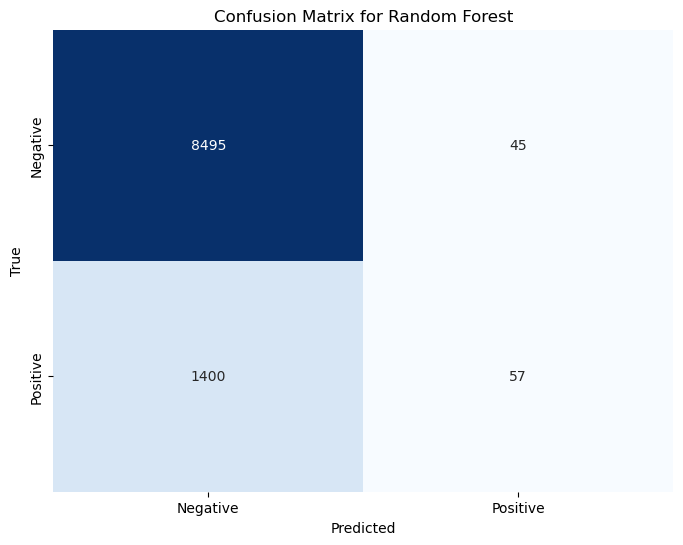

In [17]:
y_pred = rf_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

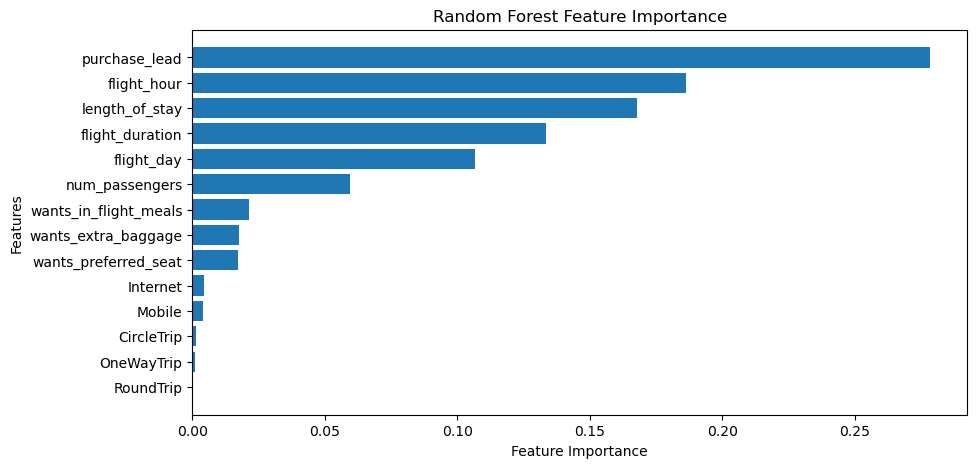

In [18]:
plt.figure(figsize=(10, 5))

sorted_idx = rf_classifier.feature_importances_.argsort()

plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1. 

## Balancing the dataset

In [19]:
scaled_df.label.value_counts()

label
0    42506
1     7476
Name: count, dtype: int64

In [20]:
# Create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [21]:
# Concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [22]:
# Shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [23]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,-0.579424,-0.653393,-0.532474,2.020261,-1.412280,0.703587,1.538334,1.158002,-1.300985,-2.810681,2.810681,-0.048231,-0.088336,0.100826,1
1,-0.579424,1.926610,0.116641,-0.381588,-0.910449,0.703587,1.538334,1.158002,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,-0.579424,-0.575548,0.264168,0.357443,0.093214,0.703587,-0.650054,1.158002,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,0.400769,-0.664514,-0.532474,-0.012073,-0.910449,0.703587,-0.650054,-0.863557,-1.474687,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,-0.579424,-0.853566,-0.561979,-0.751103,-0.408618,-1.421288,-0.650054,-0.863557,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.579424,-0.664514,0.057631,0.542200,0.595045,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15472,-0.579424,1.314971,0.116641,-0.196830,1.598707,-1.421288,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15473,-0.579424,-0.720117,-0.502969,0.542200,0.093214,0.703587,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15474,0.400769,0.525401,-0.561979,-1.120618,0.595045,0.703587,-0.650054,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1


In [24]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [25]:
clf_rf = RandomForestClassifier(n_estimators=50,max_depth=50 , min_samples_split=5,random_state=0)

In [26]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

# Calculate recall and specificity
recall = round(recall_score(y_test, y_pred_test), 2)

# Specificity is recall for the negative class (0)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0), 2)

# Calculate f1 score, accuracy, and precision as before
f1 = round(f1_score(y_test, y_pred_test), 2)
acc = round(accuracy_score(y_test, y_pred_test), 2)
pre = round(precision_score(y_test, y_pred_test), 2)

print(f"Accuracy for testing data is {acc}")
print(f"Precision for testing data is {pre}")
print(f"Recall for testing data is {recall}")
print(f"Specificity for testing data is {specificity}")
print(f"f1 for testing data is {f1}")

Accuracy for testing data is 0.61
Precision for testing data is 0.6
Recall for testing data is 0.57
Specificity for testing data is 0.64
f1 for testing data is 0.59


In [34]:
y_pred = clf_rf.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[1017  574]
 [ 643  862]]


Text(0.5, 0, 'Random Forest Feature Importance')

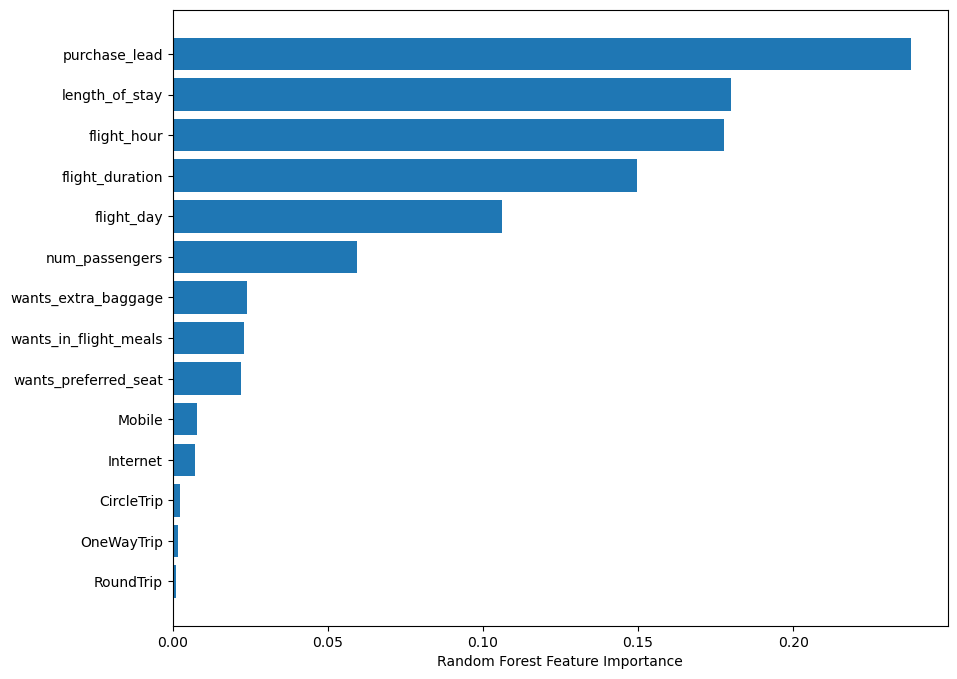

In [28]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")